In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
# Cargar el conjunto de datos de Iris
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target

In [23]:

# Filtrar las clases para tener un problema de clasificación binaria
df = df[df['species'] != 0]
#df['species'] = df['species'].apply(lambda x: 1 if x == 1 else 0)

# Mostrar las primeras filas del conjunto de datos
print(df.head())

# Selección de características y variable objetivo
X = df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
y = df['species']

# División de los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
50                7.0               3.2                4.7               1.4   
51                6.4               3.2                4.5               1.5   
52                6.9               3.1                4.9               1.5   
53                5.5               2.3                4.0               1.3   
54                6.5               2.8                4.6               1.5   

    species  
50        1  
51        1  
52        1  
53        1  
54        1  


In [19]:
#print(df)

In [24]:
# Crear el modelo de regresión logística
model = LogisticRegression()

# Entrenar el modelo
model.fit(X_train, y_train)


LogisticRegression()

In [25]:
# Predicciones
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Métricas de evaluación
print(f"Precisión en entrenamiento: {accuracy_score(y_train, y_train_pred)}")
print(f"Precisión en prueba: {accuracy_score(y_test, y_test_pred)}")
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_test_pred))
print("Informe de clasificación:")
print(classification_report(y_test, y_test_pred))


Precisión en entrenamiento: 0.975
Precisión en prueba: 0.95
Matriz de confusión:
[[11  1]
 [ 0  8]]
Informe de clasificación:
              precision    recall  f1-score   support

           1       1.00      0.92      0.96        12
           2       0.89      1.00      0.94         8

    accuracy                           0.95        20
   macro avg       0.94      0.96      0.95        20
weighted avg       0.96      0.95      0.95        20



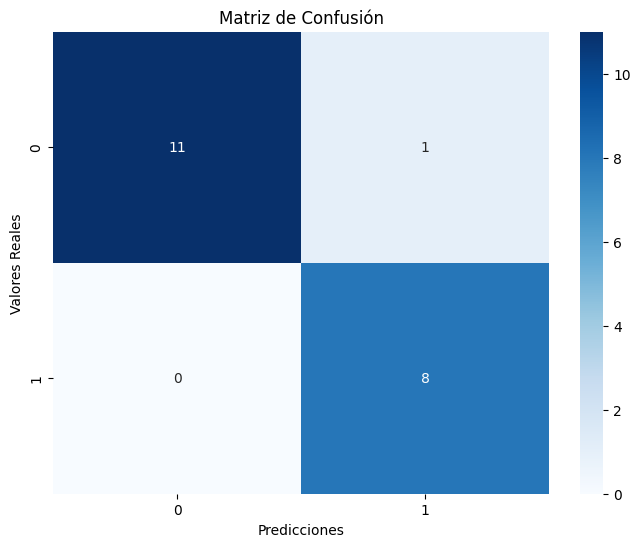

In [26]:
# Gráfico de matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicciones')
plt.ylabel('Valores Reales')
plt.title('Matriz de Confusión')
plt.show()
